<a href="https://colab.research.google.com/github/2303a51885/AIML-2025/blob/main/Lab04_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB -04: Linear Regrssion on California Housing Price**
# **Linear regression primer**


# Part 1 – Import the required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from google.colab import files

In [ ]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

# Check basic info on the data set
#'info()' method to check the data types and number

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


#'describe()' method to get the statistical summary of the various features of the data set

In [ ]:

df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
10%     -122.280000     33.620000           12.000000    949.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
90%     -117.240000     38.480000           46.000000   4677.100000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
10%        199.000000    514.000000    185.000000       1.910700   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
90%        968.000000   2578.200000    893.000000       6.194900   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
10%          81900.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
90%         379600.000000  
max         500001.000000

# 'columns' method to get the names of the columns (features)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# **Basic plotting and visualization on the data set**
#Pairplots using seaborn

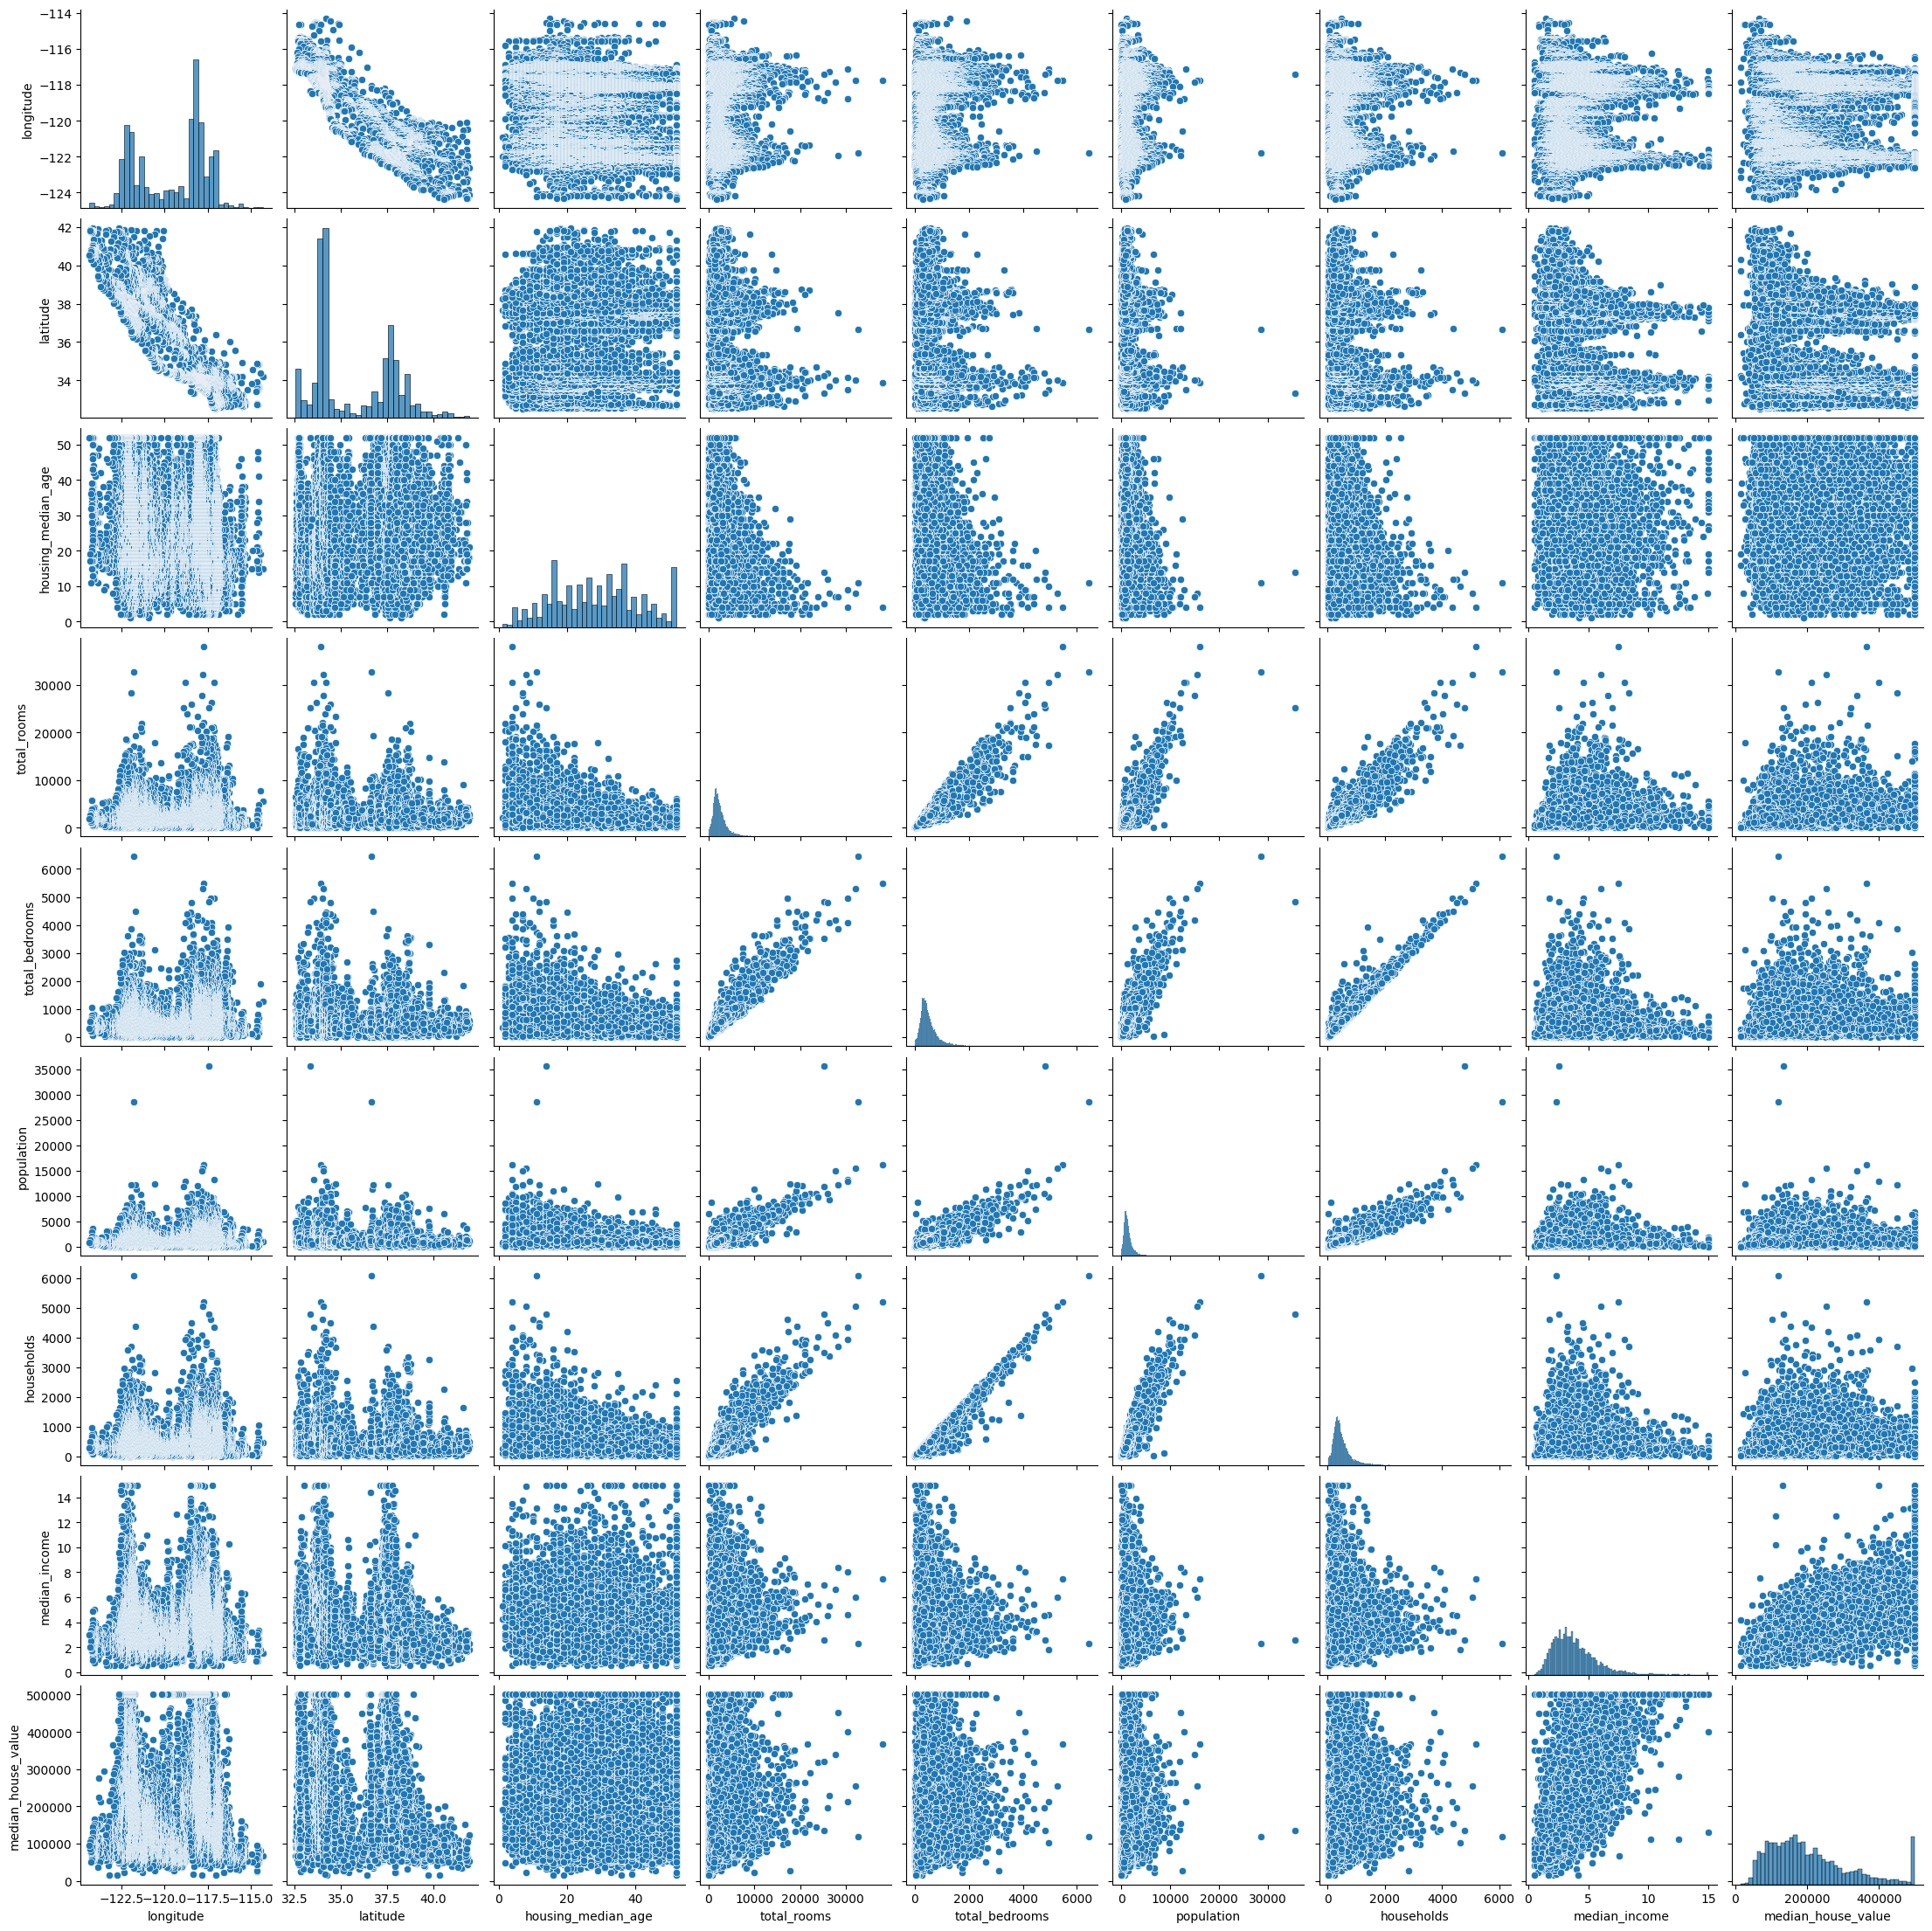

In [ ]:
sns.pairplot(df)
plt.show()

# **Distribution of price (the predicted quantity)**

<Axes: ylabel='Frequency'>

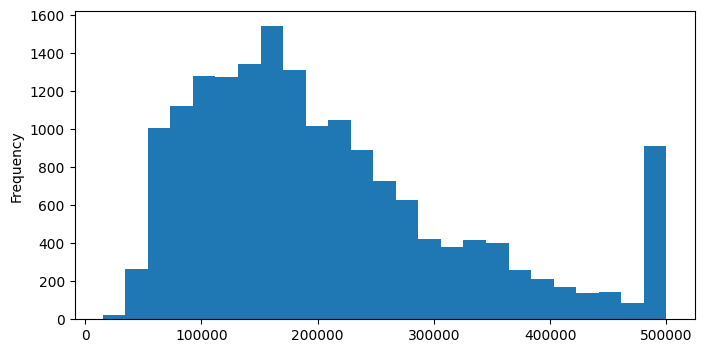

In [ ]:
df['median_house_value'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

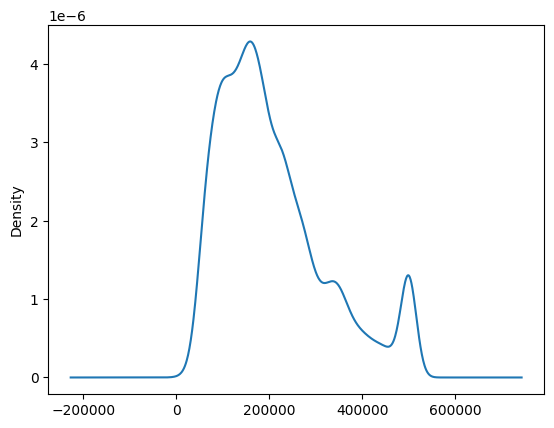

In [ ]:
df['median_house_value'].plot.density()

In [ ]:
df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_median_age       -0.320434   -0.295890   -0.302754      -0.115932   
total_rooms               0.928403    0.860170    0.919018       0.195383   
total_bedrooms            1.000000    0.881169    0.980920      -0.013495   
population                0.881169    1.000000    0.909247      -0.000638   
households                0.980920    0.909247    1.000000       0.007644   
median_income            -0.013495   -0.000638    0.007644       1.000000   
median_house_value        0.045783   -0.027850    0.061031       0.691871   

                    median_house_value  
longitude                    -0.044982  
latitude                     -0.144917  
housing_median_age            0.106758  
total_rooms                   0.130991  
total_bedrooms                0.045783  
population                   -0.027850  
households                    0.061031  
median_income                 0.691871  
median_house_value            1.000000

<Axes: >

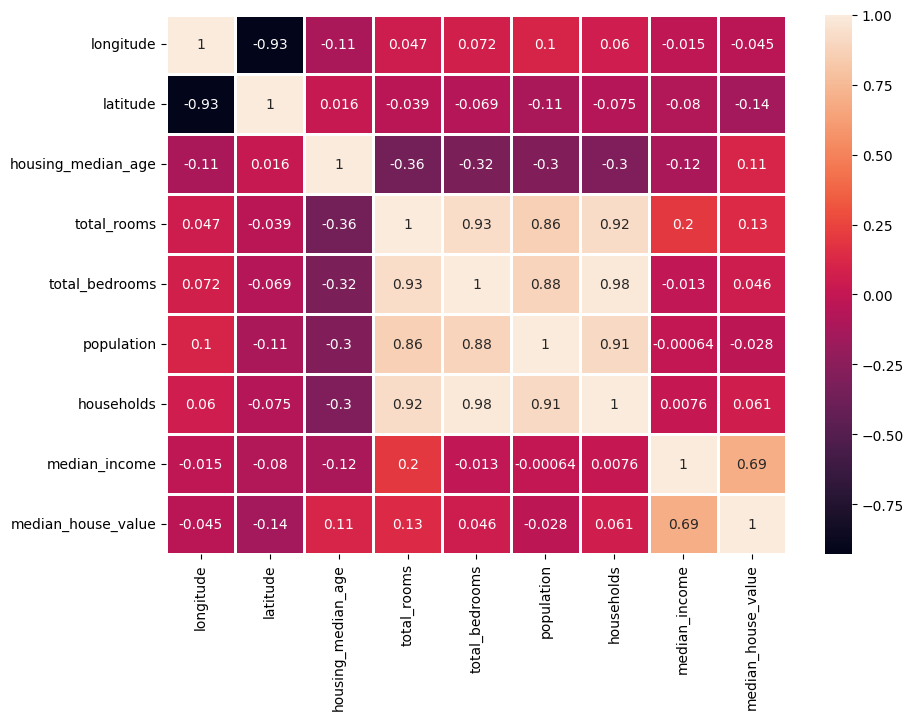

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

# **Feature and variable sets**
Make a list of data frame column names

In [ ]:
## Y = MX +C where Y is dependent, X is independent features
## M is slope, C is intercept
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column, len_feature

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value'],
 9)

# Put all the numerical features in X and Median House Value in y, ignore lat, long which is string for linear regression

In [ ]:
X = df[l_column[2:len_feature-1]]
y = df[l_column[len_feature-1]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (17000, 6)
Variable set size: (17000,)


In [ ]:
X.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                15.0       5612.0          1283.0      1015.0       472.0   
1                19.0       7650.0          1901.0      1129.0       463.0   
2                17.0        720.0           174.0       333.0       117.0   
3                14.0       1501.0           337.0       515.0       226.0   
4                20.0       1454.0           326.0       624.0       262.0   

   median_income  
0         1.4936  
1         1.8200  
2         1.6509  
3         3.1917  
4         1.9250

In [ ]:
y.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

# Part -02: Test-train split
Import train_test_split function from scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

**Create X and y train and test splits into 80-20 ratio in one command using a split ratio and a random seed**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((13600,), (3400,), (13600, 6), (3400, 6))

# Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)

In [ ]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (13600, 6)
Test feature set size: (3400, 6)
Training variable set size: (13600,)
Test variable set size: (3400,)


**Model fit and training**
Import linear regression model estimator from scikit-learn and instantiate

In [ ]:
X = df.drop(columns='median_house_value')
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on to the instantiated object itself

In [ ]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Non-numeric columns: Index([], dtype='object')


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -3652253.1348448903
Coefficients: [-4.34652477e+04 -4.31063044e+04  1.13172438e+03 -8.84326062e+00
  1.13707973e+02 -3.56570769e+01  4.51475550e+01  4.01947263e+04]


In [ ]:
intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -3652253.1348448903
Coefficients: [-4.34652477e+04 -4.31063044e+04  1.13172438e+03 -8.84326062e+00
  1.13707973e+02 -3.56570769e+01  4.51475550e+01  4.01947263e+04]


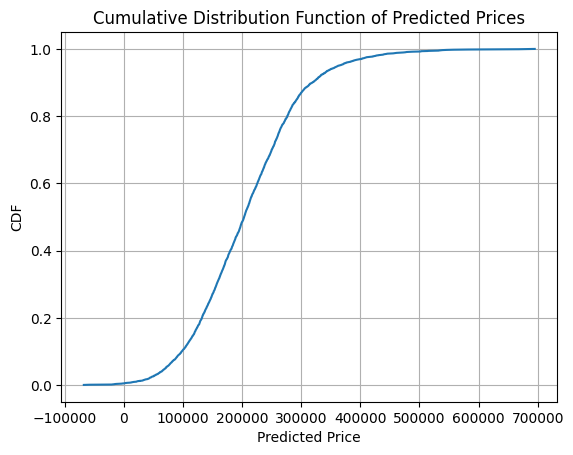

In [ ]:
import numpy as np
y_pred = model.predict(X_test)
y_sorted = np.sort(y_pred)
cdf = np.arange(1, len(y_sorted)+1) / len(y_sorted)
plt.plot(y_sorted, cdf)
plt.xlabel('Predicted Price')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Predicted Prices')
plt.grid(True)
plt.show()

# Part-3 Model Evaluation Metrics.

In [ ]:
import numpy as np
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
standard_errors = model_sm.bse
t_statistics = model_sm.tvalues
print("Standard Errors for coefficients:\n", standard_errors)
print("\nT-statistics for coefficients:\n", t_statistics)

Standard Errors for coefficients:
 const                 77919.664788
longitude               889.126931
latitude                840.249852
housing_median_age       53.369405
total_rooms               0.978286
total_bedrooms            8.437617
population                1.287088
households                9.231879
median_income           413.161798
dtype: float64

T-statistics for coefficients:
 const                -46.872033
longitude            -48.885312
latitude             -51.301770
housing_median_age    21.205490
total_rooms           -9.039550
total_bedrooms        13.476314
population           -27.703684
households             4.890397
median_income         97.285680
dtype: float64


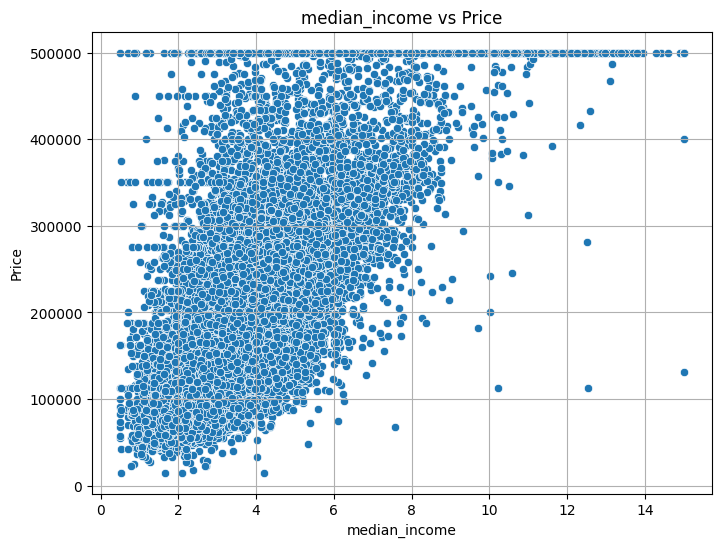

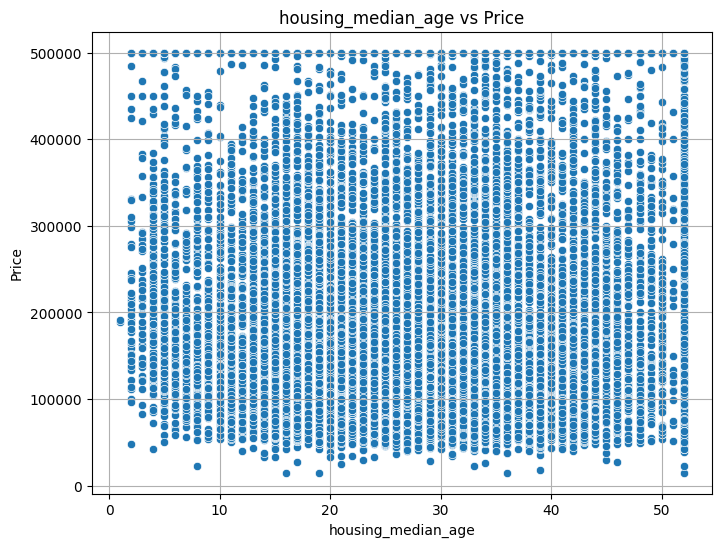

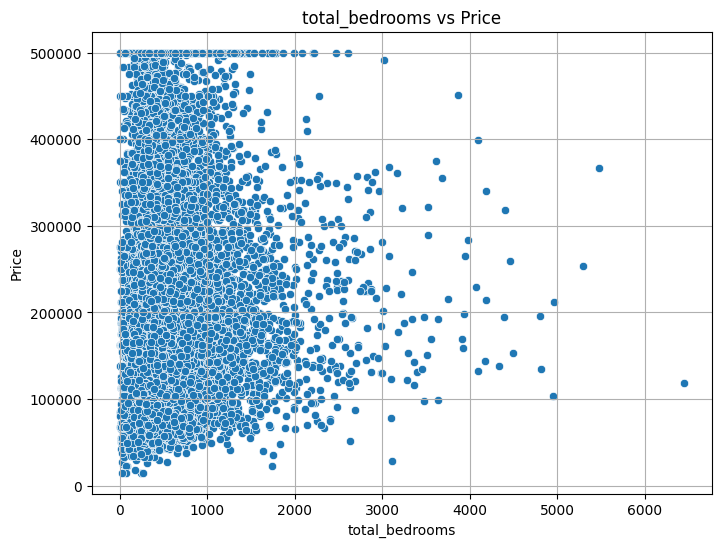

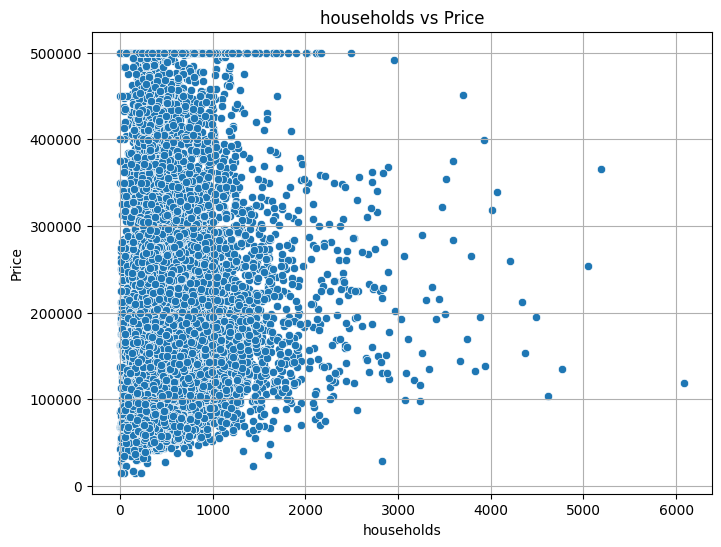

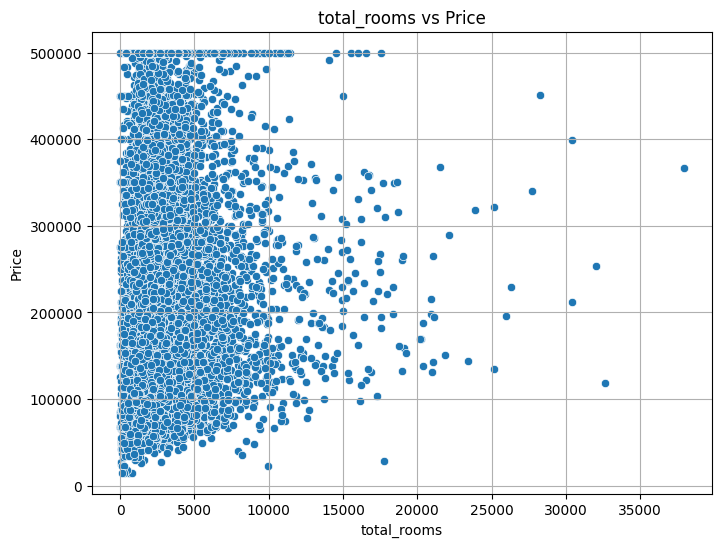

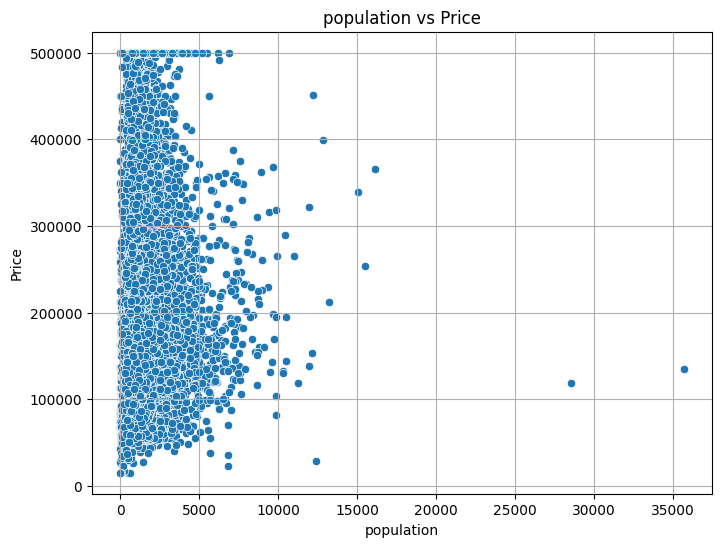

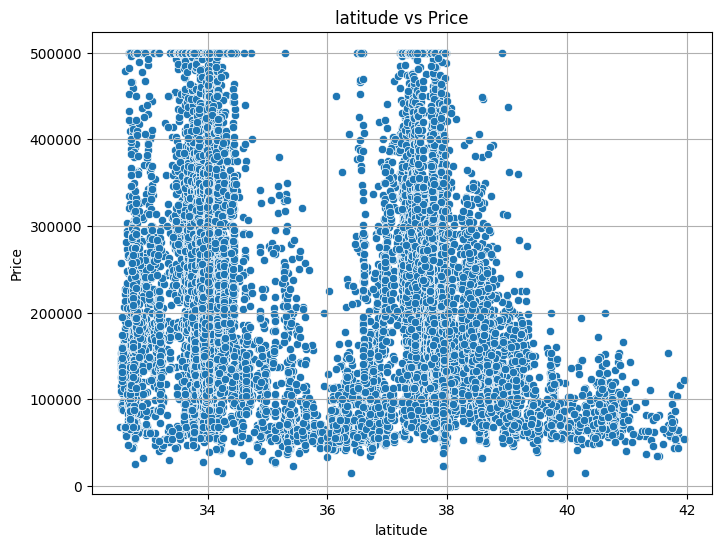

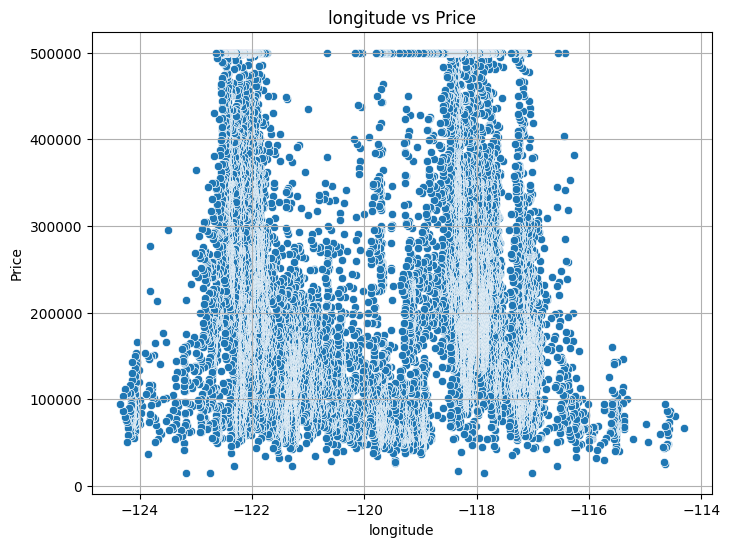

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
coefficients = model_sm.params[1:]
cdf_sorted_coeffs = coefficients.sort_values(ascending=False)
for feature in cdf_sorted_coeffs.index:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['median_house_value'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_test_pred = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.6636


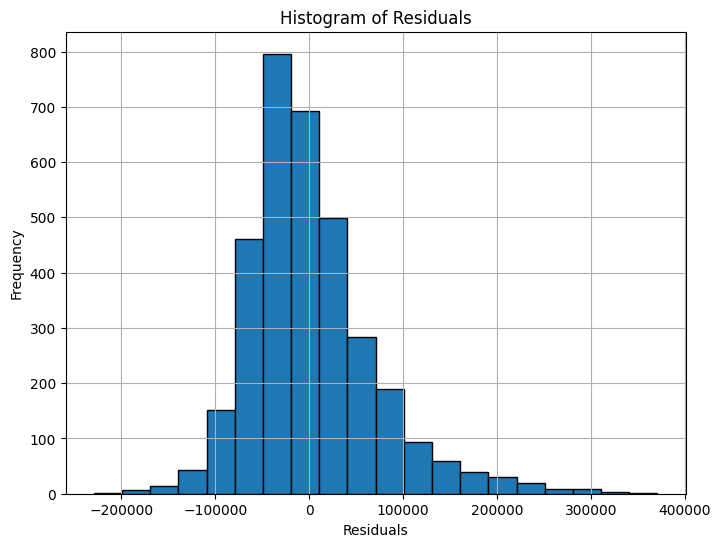

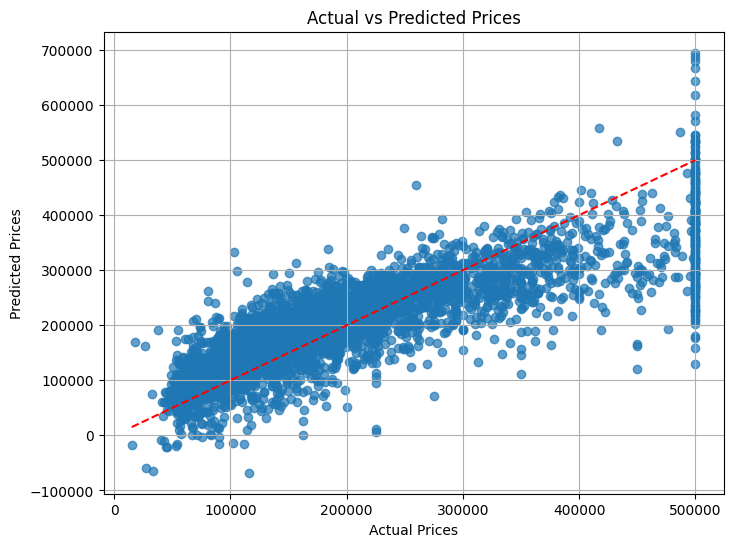

In [ ]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_test_pred)
sse = np.sum((y_test - y_test_pred) ** 2)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Sum of Squared Errors (SSE): {sse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 49983.4747
Sum of Squared Errors (SSE): 15757838581159.0977
Root Mean Squared Error (RMSE): 68078.3255
R² Score: 0.6636


# Compute the MinMax value between Observed Price and Ex-pected Price for the Calfornia Housing Data.

In [ ]:
def minmax_normalize(series):
    return (series - series.min()) / (series.max() - series.min())
df['Price_minmax'] = minmax_normalize(df['median_house_value'])
print(df[['median_house_value', 'Price_minmax']].head())

   median_house_value  Price_minmax
0             66900.0      0.107012
1             80100.0      0.134228
2             85700.0      0.145775
3             73400.0      0.120414
4             65500.0      0.104125


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_normalized = df.copy()
df_normalized[numeric_cols] = df_normalized[numeric_cols].apply(minmax_normalize)
print(df_normalized.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1.000000  0.175345            0.274510     0.147885        0.198945   
1   0.984064  0.197662            0.352941     0.201608        0.294848   
2   0.975100  0.122210            0.313725     0.018927        0.026847   
3   0.974104  0.116897            0.254902     0.039515        0.052142   
4   0.974104  0.109458            0.372549     0.038276        0.050435   

   population  households  median_income  median_house_value  Price_minmax  
0    0.028364    0.077454       0.068530            0.107012      0.107012  
1    0.031559    0.075974       0.091040            0.134228      0.134228  
2    0.009249    0.019076       0.079378            0.145775      0.145775  
3    0.014350    0.037000       0.185639            0.120414      0.120414  
4    0.017405    0.042921       0.098281            0.104125      0.104125  


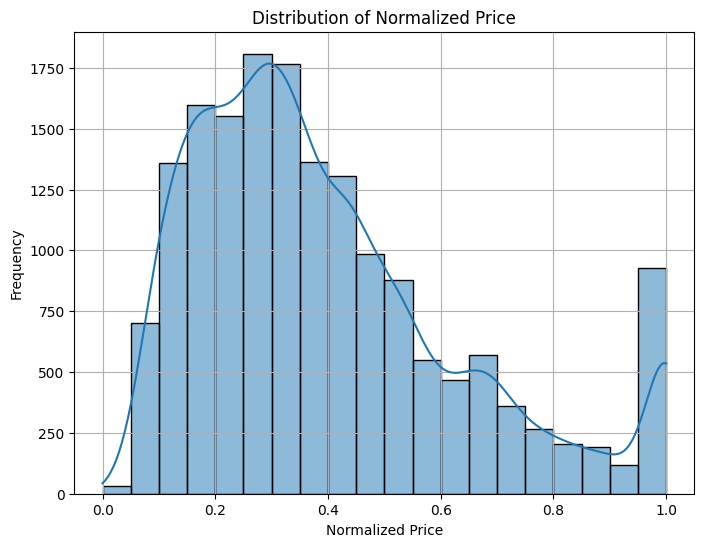

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Price_minmax'], bins=20, kde=True)
plt.title('Distribution of Normalized Price')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()